# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

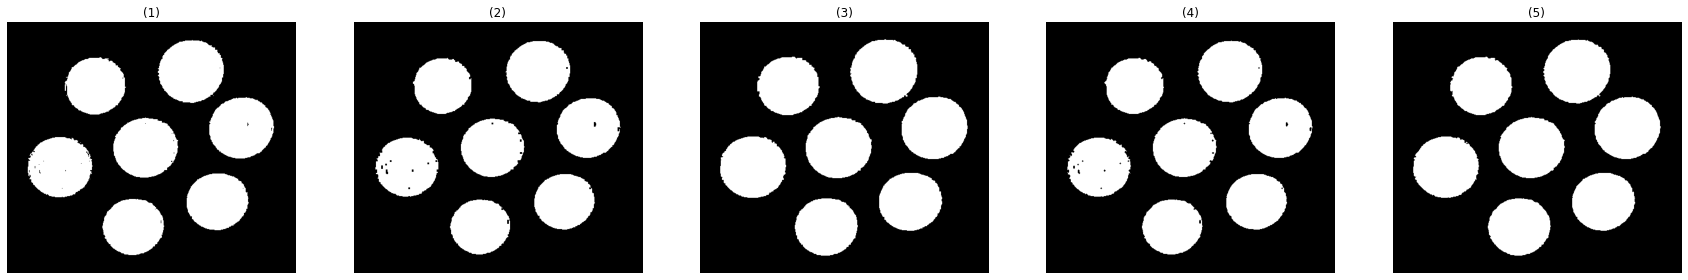

In [45]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

def erosion(bin_img, window_size = 3):
    window = np.ones((window_size))
    eroded_img = np.copy(bin_img)
    half_size = window_size//2
    for i in range(half_size, bin_img.shape[0] - half_size):
        for j in range(half_size, bin_img.shape[1] - half_size):
            eroded_img[i][j] = np.all(bin_img[(i - half_size) : (i + half_size + 1), (j - half_size) : (j + half_size + 1)])
    return eroded_img
    
def dilation(bin_img, window_size = 3):
    window = np.ones((window_size))
    dilated_img = np.copy(bin_img)
    half_size = window_size//2
    for i in range(half_size, bin_img.shape[0] - half_size):
        for j in range(half_size, bin_img.shape[1] - half_size):
            if(bin_img[i][j]):
                dilated_img[(i - half_size) : (i + half_size + 1), (j - half_size) : (j + half_size + 1)] = 1
    return dilated_img

img = (io.imread('img/coins.jpg'))
bin_img = rgb2hsv(img)[:,:,0] < 0.4
eroded_img = erosion(bin_img, 3)
dilated_img = dilation(bin_img, 3)
bin_eroded_img = binary_erosion(bin_img)
bin_dilated_img = binary_dilation(bin_img)
show_images([bin_img, eroded_img, dilated_img, bin_eroded_img, bin_dilated_img])


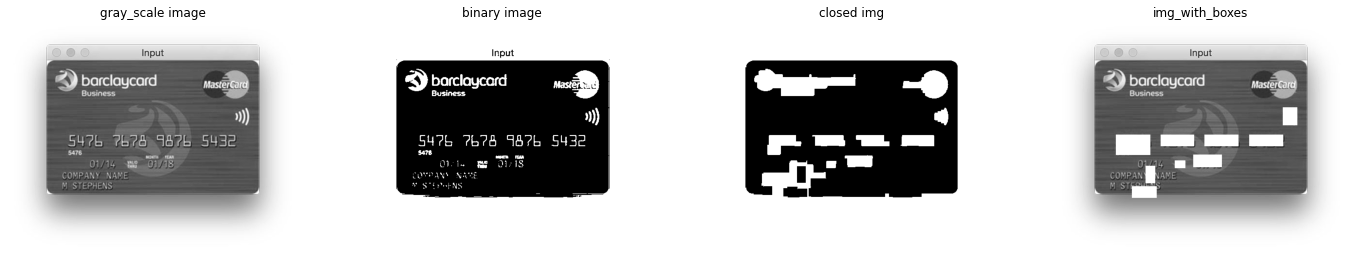

In [110]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
img = rgb2gray(io.imread('img/card.jpg'))
img_with_boxes = np.copy(img)
bin_img = img > 0.58
closed_img = erosion(dilation(bin_img, 17), 17)
bounding_boxes_arr = find_contours(closed_img, 0.9)

bounding_boxes = []
for box_arr in bounding_boxes_arr:
    box = [min(box_arr[:, 1]), max(box_arr[:, 1]), min(box_arr[:, 0]), max(box_arr[:, 0])]
    if(abs(box[0] - box[1]) < 100 and abs(box[2] - box[3]) < 50):
        bounding_boxes.append(box)

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    img_with_boxes[rr.astype(int), cc.astype(int)] = 1 #set color white

show_images([img, bin_img, closed_img, img_with_boxes], ['gray_scale image', 'binary image', 'closed img', 'img_with_boxes'])


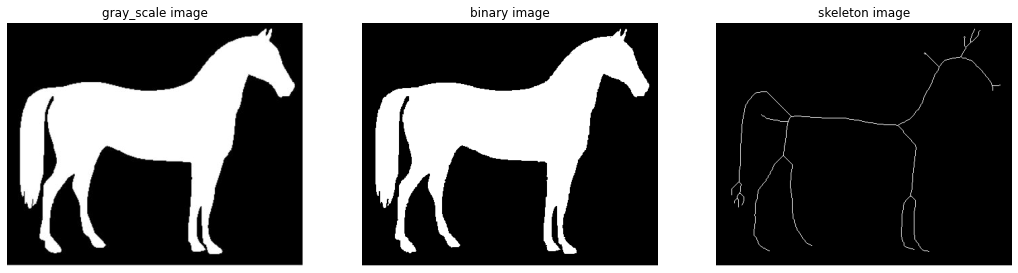

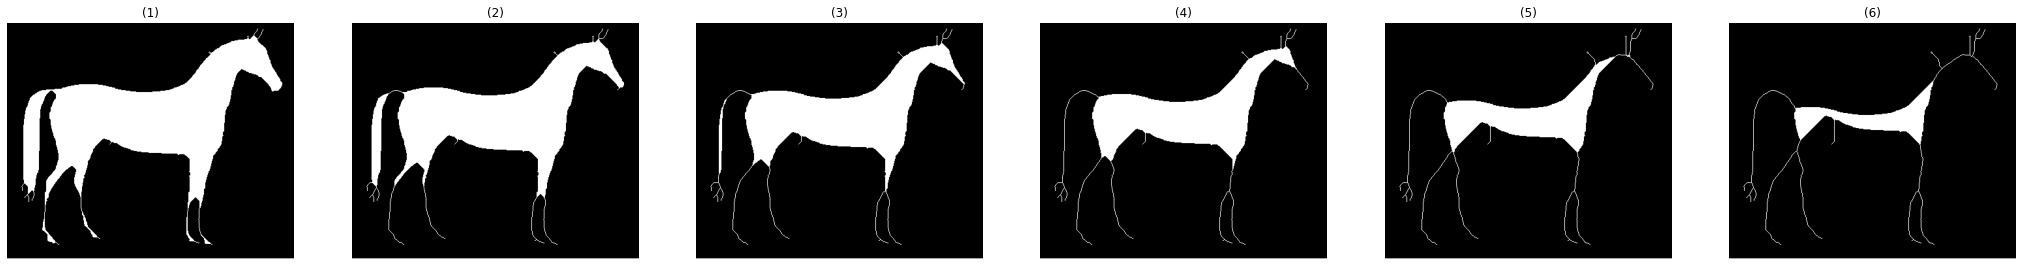

In [117]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = rgb2gray(io.imread('img/horse.jpg'))
bin_img = img > 0.9
skeleton = skeletonize(bin_img)
thin_arr = []
for max_iter in [5, 10, 15, 20, 30, 40]:
    thin_arr.append(thin(bin_img, max_iter))
show_images([img, bin_img, skeleton], ['gray_scale image', 'binary image', 'skeleton image'])
show_images(thin_arr)
